In [15]:
import time
from groundlight import Groundlight
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# %matplotlib inline

In [16]:
gl = Groundlight()

In [17]:
gl.list_detectors()

PaginatedDetectorList(count=3, next=None, previous=None, results=[Detector(id='det_2LR6Tgjaw9yWlZR4x0GOXlx42Je', type=<DetectorTypeEnum.detector: 'detector'>, created_at=datetime.datetime(2023, 2, 7, 17, 59, 16, 997669, tzinfo=tzoffset(None, -28800)), name='is_tiger_present', query='Is there a Tiger visible in the image?', group_name='DemoSet', confidence_threshold=0.75), Detector(id='det_2LR4EEhoYS7nu8YGuexuikDtmuj', type=<DetectorTypeEnum.detector: 'detector'>, created_at=datetime.datetime(2023, 2, 7, 17, 40, 47, 301940, tzinfo=tzoffset(None, -28800)), name='is_koala_present', query='Is there a Koala visible in the image?', group_name='DemoSet', confidence_threshold=0.7), Detector(id='det_2LQMza5pE0VdUkRWhtpmVJBpAHd', type=<DetectorTypeEnum.detector: 'detector'>, created_at=datetime.datetime(2023, 2, 7, 11, 45, 15, 940530, tzinfo=tzoffset(None, -28800)), name='is_at_desk', query='Is someone sitting at the desk this camera is on?', group_name='DemoSet', confidence_threshold=0.75)])

In [29]:
STREAMS = {
    "Baboon": "https://zssd-baboon.preview.api.camzonecdn.com/previewimage",
    "Tiger": "https://zssd-tiger.preview.api.camzonecdn.com/previewimage",
    "Koala": "https://zssd-koala.preview.api.camzonecdn.com/previewimage",
    "Polar Bear": "https://polarplunge.preview.api.camzonecdn.com/previewimage",
    "Ape": "https://ape.preview.api.camzonecdn.com/previewimage",
}
DETECTORS = {}

In [30]:
for animal in STREAMS.keys():
    query = f"Is there a {animal} visible in the image?"
    animal_cleaned = animal.lower().replace(' ', '')
    detector_name = f"is_{animal_cleaned}_present"
    d = gl.get_or_create_detector(name=detector_name, query=query)  # define with natural language
    DETECTORS[animal] = d

In [31]:
DETECTORS

{'Baboon': Detector(id='det_2LTLKaYnE5hMrZGARBlQcC99waU', type=<DetectorTypeEnum.detector: 'detector'>, created_at=datetime.datetime(2023, 2, 8, 13, 1, 2, 512685, tzinfo=tzoffset(None, -28800)), name='is_baboon_present', query='Is there a Baboon visible in the image?', group_name='__DEFAULT', confidence_threshold=0.9),
 'Tiger': Detector(id='det_2LR6Tgjaw9yWlZR4x0GOXlx42Je', type=<DetectorTypeEnum.detector: 'detector'>, created_at=datetime.datetime(2023, 2, 7, 17, 59, 16, 997669, tzinfo=tzoffset(None, -28800)), name='is_tiger_present', query='Is there a Tiger visible in the image?', group_name='DemoSet', confidence_threshold=0.75),
 'Koala': Detector(id='det_2LR4EEhoYS7nu8YGuexuikDtmuj', type=<DetectorTypeEnum.detector: 'detector'>, created_at=datetime.datetime(2023, 2, 7, 17, 40, 47, 301940, tzinfo=tzoffset(None, -28800)), name='is_koala_present', query='Is there a Koala visible in the image?', group_name='DemoSet', confidence_threshold=0.7),
 'Polar Bear': Detector(id='det_2LTLKflvZP

In [34]:
class ImageCaptureException(Exception):
    pass

def capture_image(source=0, swap_rb=True) -> np.ndarray:
    vid = cv2.VideoCapture(source)
    time.sleep(1)  # Allow cam to initialize
    result, image = vid.read()
    vid.release()
    if not result:
        raise ImageCaptureException
    if swap_rb:
        image = image[:, :, ::-1]
    return image

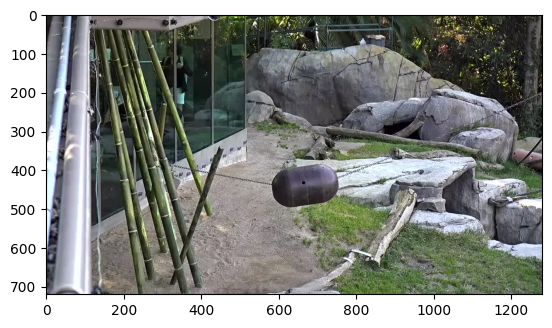

In [35]:
plt.imshow(capture_image(STREAMS["Ape"]))

In [36]:
N_IMAGES_TO_SUBMIT = 30
image_queries = []

for i in range(N_IMAGES_TO_SUBMIT):
    print(f"--- {i} ---")
    for animal, stream in STREAMS.items():
        print(f"Capturing image for {animal}")
        try:
            image_arr = capture_image(stream, swap_rb=True)
        except ImageCaptureException:
            print("Exception. Skipping submission of image query.")
            continue
        image_query = gl.submit_image_query(detector=DETECTORS[animal], image=image_arr, wait=0)
        image_queries.append(image_query)
        
    time.sleep(60 * 10)  # Capture every 10 min

--- 0 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 1 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 2 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 3 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 4 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 5 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 6 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image 

[tcp @ 0x1045041c0] Failed to resolve hostname zssd-baboon.preview.api.camzonecdn.com: nodename nor servname provided, or not known
OpenCV: Couldn't read video stream from file "https://zssd-baboon.preview.api.camzonecdn.com/previewimage"
[ERROR:0@23388.265] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): https://zssd-baboon.preview.api.camzonecdn.com/previewimage in function 'icvExtractPattern'




Exception. Skipping submission of image query.
Capturing image for Tiger


[tcp @ 0x1045041c0] Failed to resolve hostname zssd-tiger.preview.api.camzonecdn.com: nodename nor servname provided, or not known
OpenCV: Couldn't read video stream from file "https://zssd-tiger.preview.api.camzonecdn.com/previewimage"
[ERROR:0@23389.280] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): https://zssd-tiger.preview.api.camzonecdn.com/previewimage in function 'icvExtractPattern'




Exception. Skipping submission of image query.
Capturing image for Koala


[tcp @ 0x106acc260] Failed to resolve hostname zssd-koala.preview.api.camzonecdn.com: nodename nor servname provided, or not known
OpenCV: Couldn't read video stream from file "https://zssd-koala.preview.api.camzonecdn.com/previewimage"
[ERROR:0@23390.303] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): https://zssd-koala.preview.api.camzonecdn.com/previewimage in function 'icvExtractPattern'




Exception. Skipping submission of image query.
Capturing image for Polar Bear


[tcp @ 0x108fde6d0] Failed to resolve hostname polarplunge.preview.api.camzonecdn.com: nodename nor servname provided, or not known
OpenCV: Couldn't read video stream from file "https://polarplunge.preview.api.camzonecdn.com/previewimage"
[ERROR:0@23391.321] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): https://polarplunge.preview.api.camzonecdn.com/previewimage in function 'icvExtractPattern'




Exception. Skipping submission of image query.
Capturing image for Ape


[tcp @ 0x108f669b0] Failed to resolve hostname ape.preview.api.camzonecdn.com: nodename nor servname provided, or not known
OpenCV: Couldn't read video stream from file "https://ape.preview.api.camzonecdn.com/previewimage"
[ERROR:0@23392.342] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): https://ape.preview.api.camzonecdn.com/previewimage in function 'icvExtractPattern'




Exception. Skipping submission of image query.
--- 13 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 14 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 15 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 16 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 17 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 18 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for Koala
Capturing image for Polar Bear
Capturing image for Ape
--- 19 ---
Capturing image for Baboon
Capturing image for Tiger
Capturing image for

In [13]:
image_queries_response = gl.list_image_queries(page_size=50)  # Would it make more sense to list image queries based on a detector?
image_queries = image_queries_response.results
image_queries

ApiTypeError: Invalid type for variable 'page'. Required value type is int and passed type was Detector at ['page']

In [69]:
img_query = image_queries[0]
img_query

ImageQuery(id='chk_2LQVYb6DcqMbGilZSv5oybBR8Qk', type=<ImageQueryTypeEnum.image_query: 'image_query'>, created_at=datetime.datetime(2023, 2, 7, 12, 55, 41, 471565, tzinfo=tzoffset(None, -28800)), query='Is someone sitting at the desk this camera is on?', detector_id='det_2LQMza5pE0VdUkRWhtpmVJBpAHd', result_type=<ResultTypeEnum.binary_classification: 'binary_classification'>, result=ClassificationResult(confidence=0.8357583010518873, label='PASS'))